In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
trdf=pd.read_csv("train.csv")
print(trdf.head)

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Util

In [96]:
print(trdf.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [97]:
trdf=trdf[['1stFlrSF','2ndFlrSF','GrLivArea','TotalBsmtSF','LowQualFinSF','LotArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','SalePrice']]

In [98]:
print(trdf.head)

<bound method NDFrame.head of       1stFlrSF  2ndFlrSF  GrLivArea  TotalBsmtSF  LowQualFinSF  LotArea  \
0          856       854       1710          856             0     8450   
1         1262         0       1262         1262             0     9600   
2          920       866       1786          920             0    11250   
3          961       756       1717          756             0     9550   
4         1145      1053       2198         1145             0    14260   
...        ...       ...        ...          ...           ...      ...   
1455       953       694       1647          953             0     7917   
1456      2073         0       2073         1542             0    13175   
1457      1188      1152       2340         1152             0     9042   
1458      1078         0       1078         1078             0     9717   
1459      1256         0       1256         1256             0     9937   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  S

<Axes: >

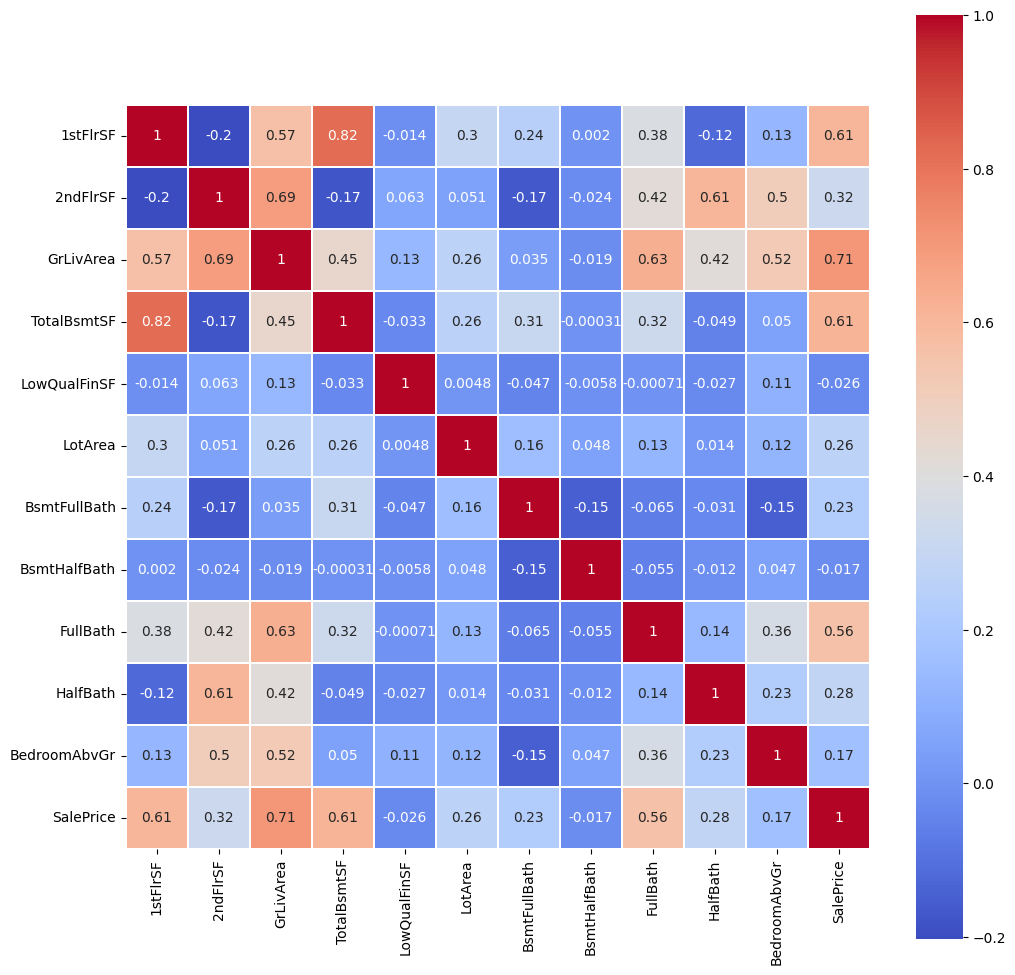

In [99]:
plt.figure(figsize=(12,12))
sns.heatmap(data=trdf.corr(),annot=True,linewidths=0.2,cmap='coolwarm', square=True)

Text(0.5, 0.98, 'Pairplot of Required Features vs Sale Price')

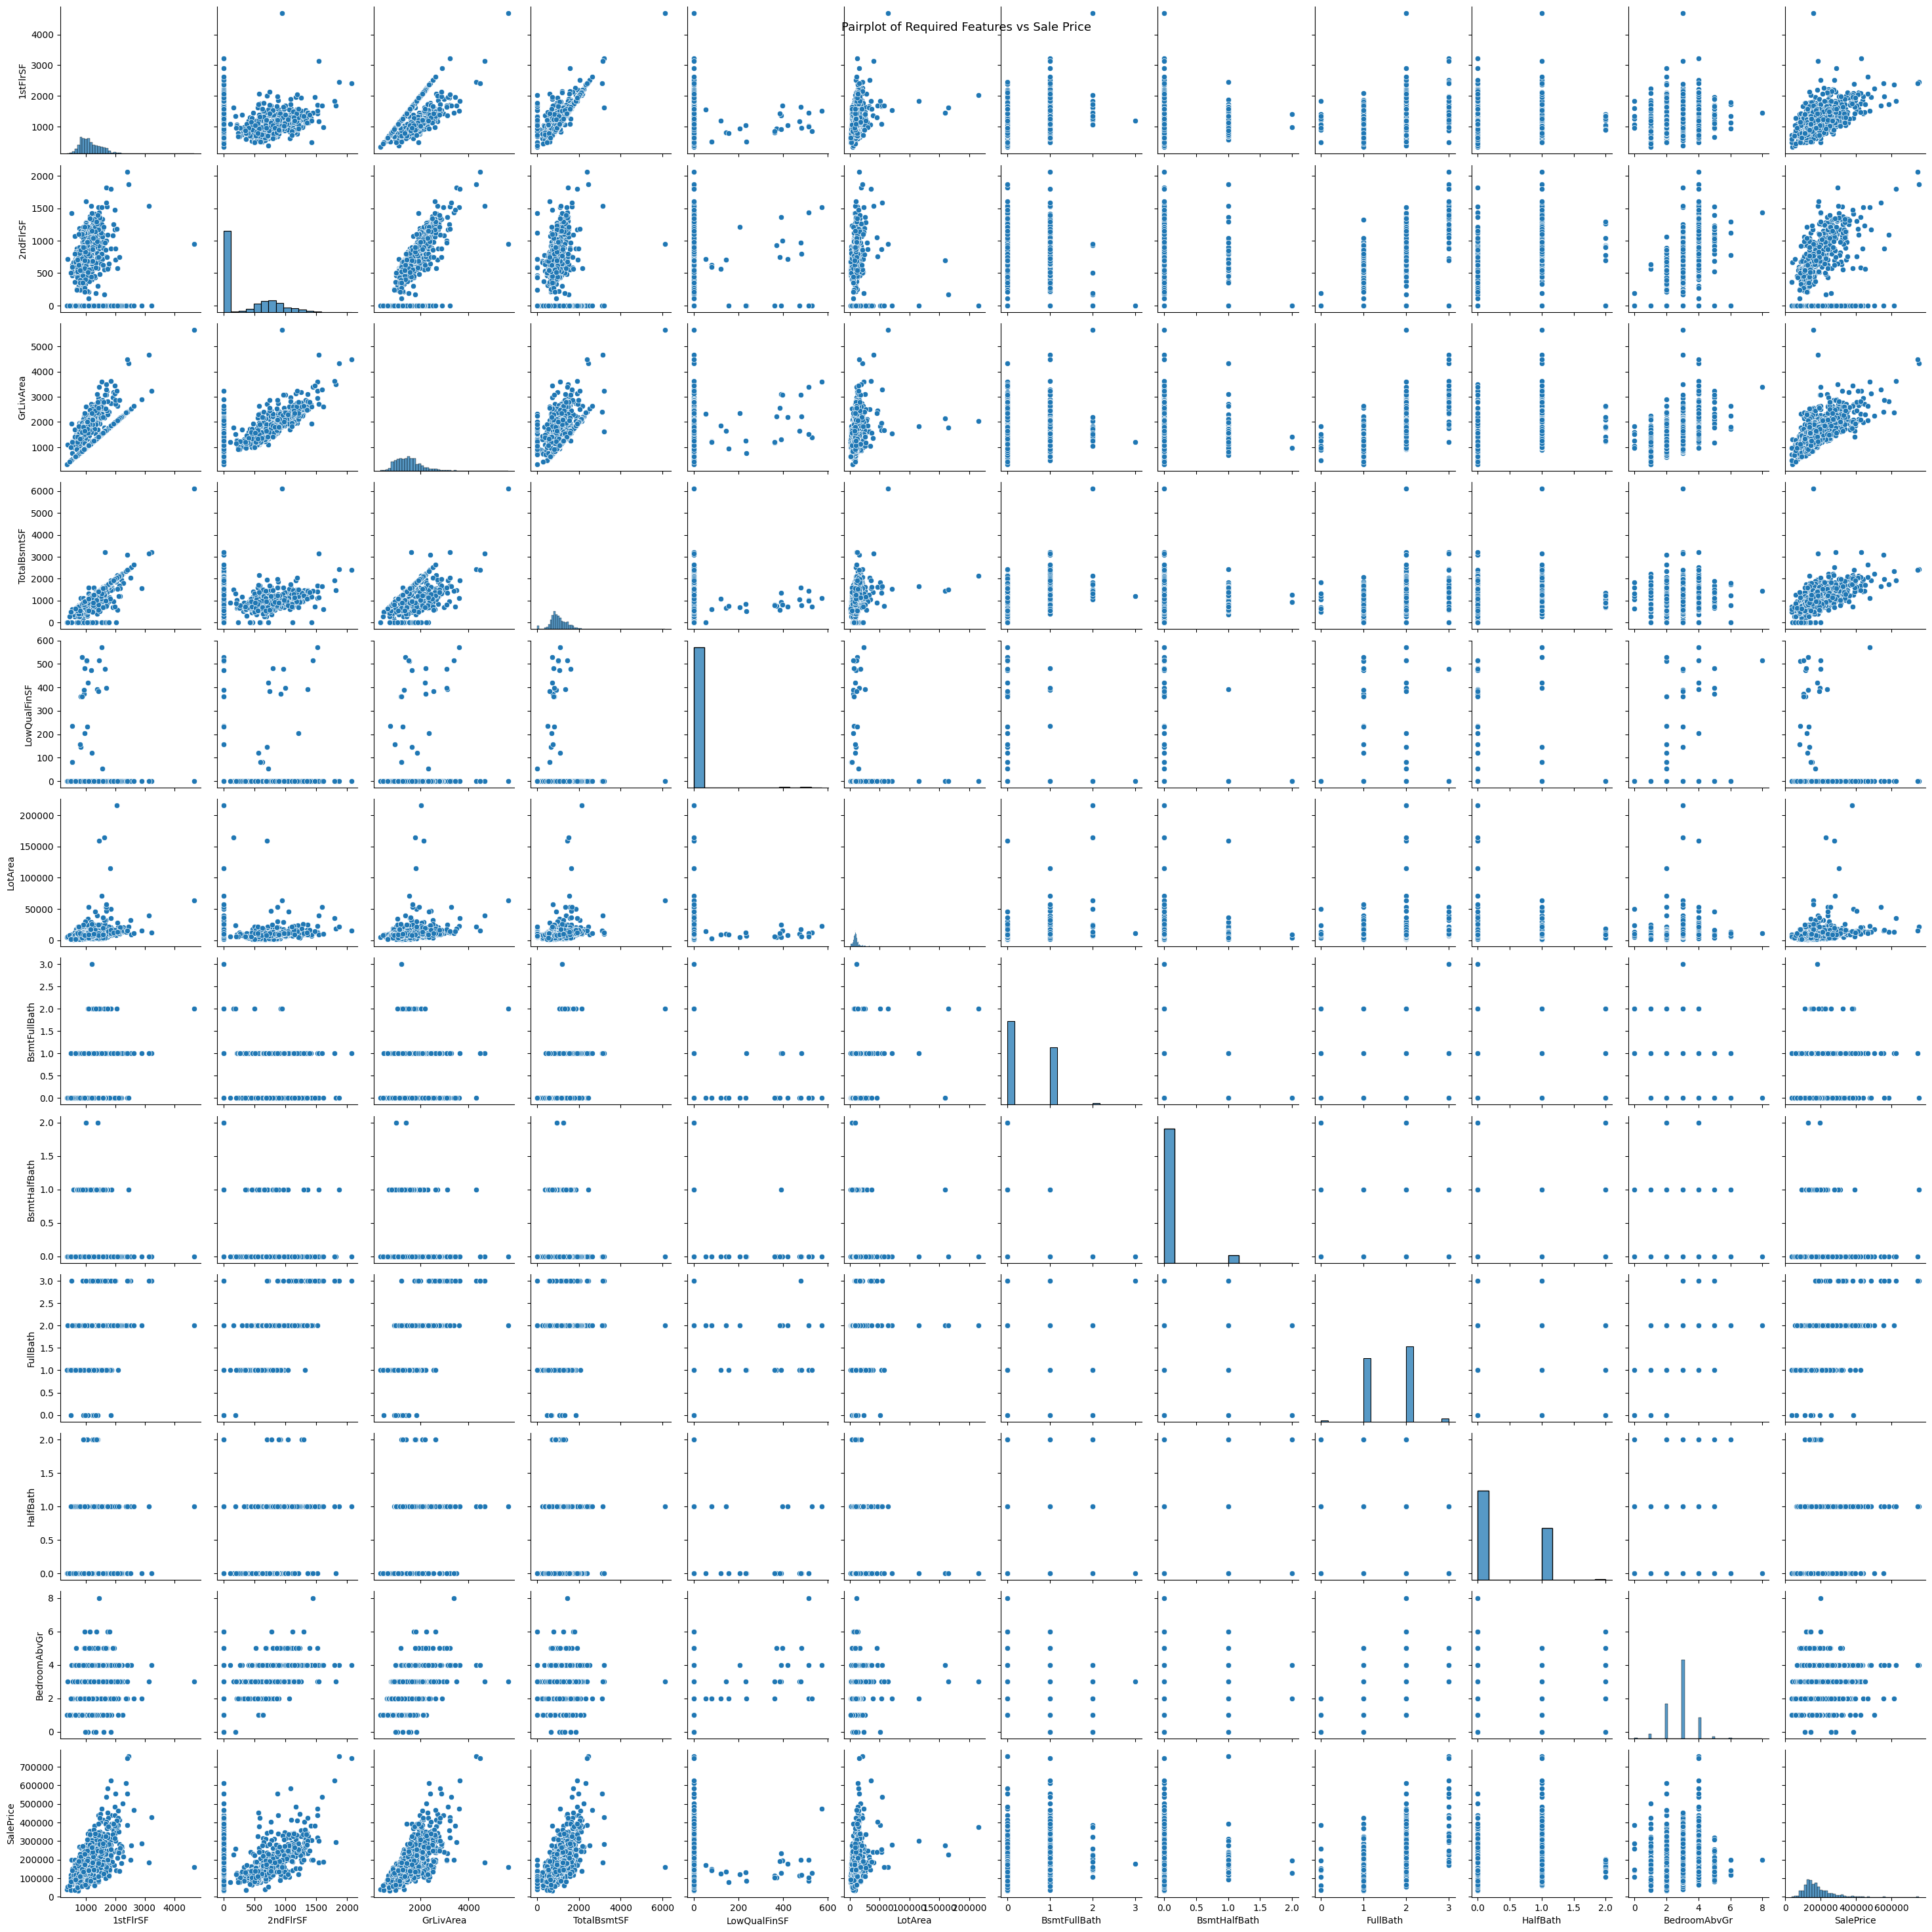

In [35]:
sns.pairplot(trdf)
plt.suptitle("Pairplot of Required Features vs Sale Price",fontsize=13)

In [100]:
trdf=trdf.dropna()

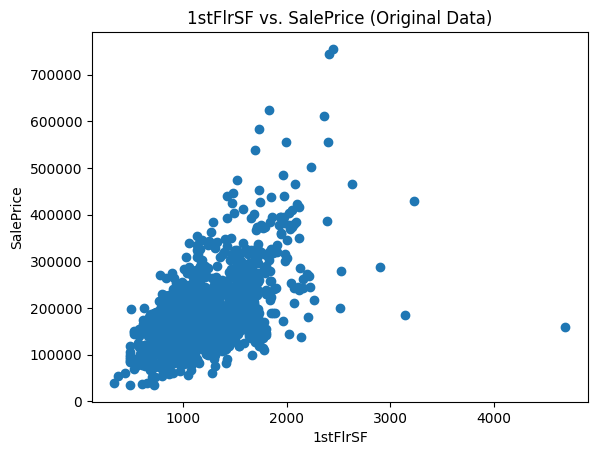

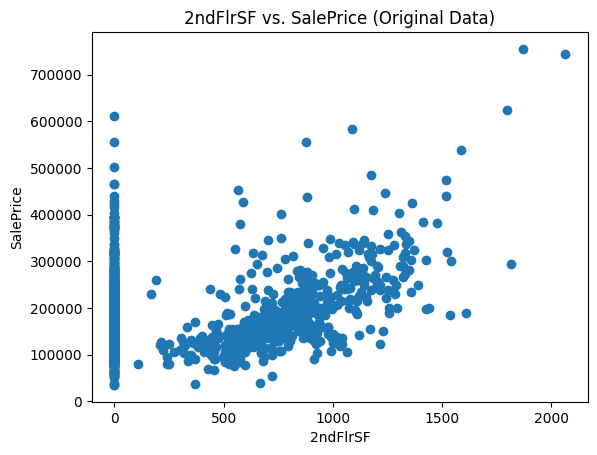

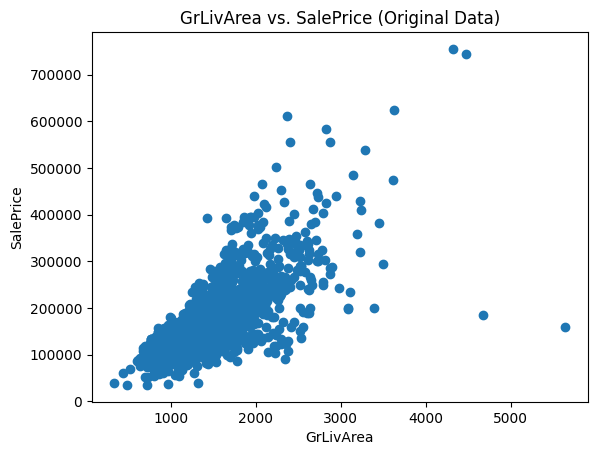

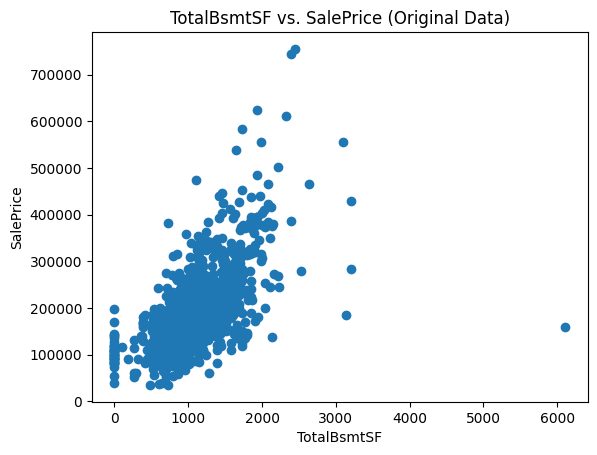

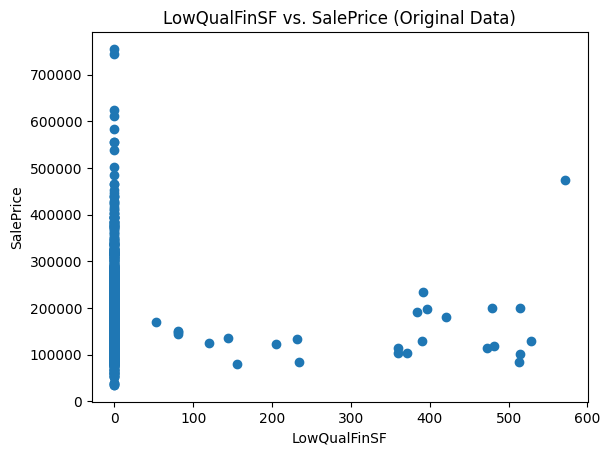

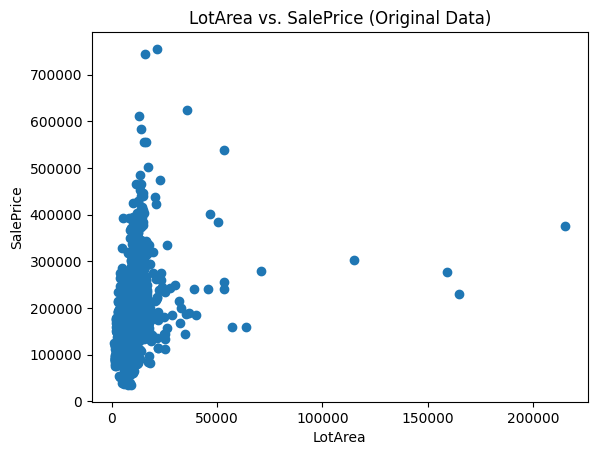

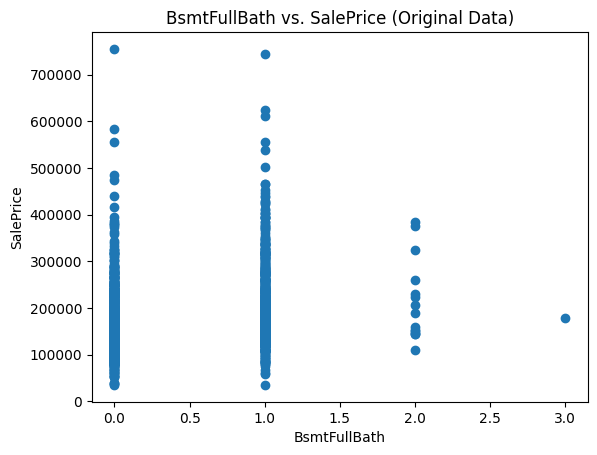

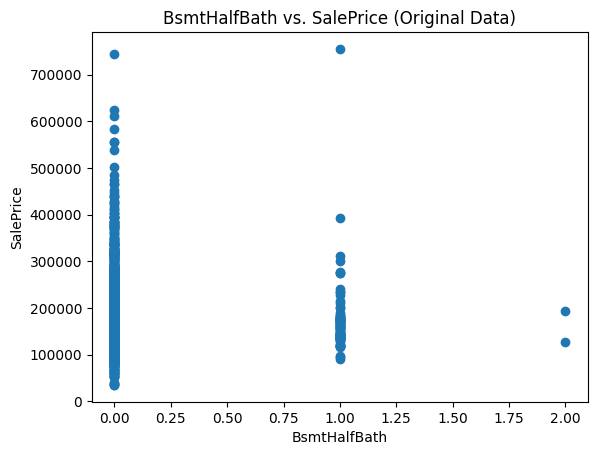

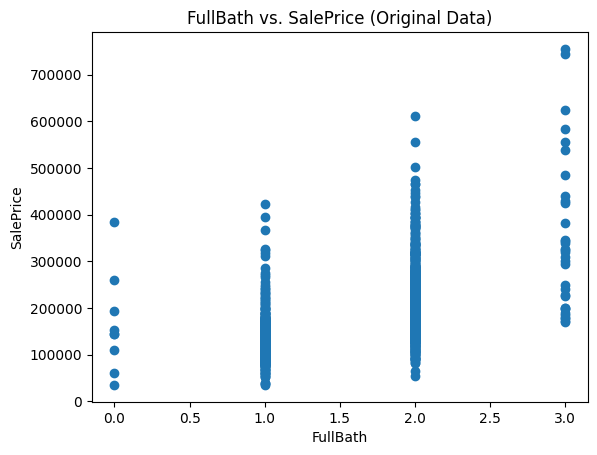

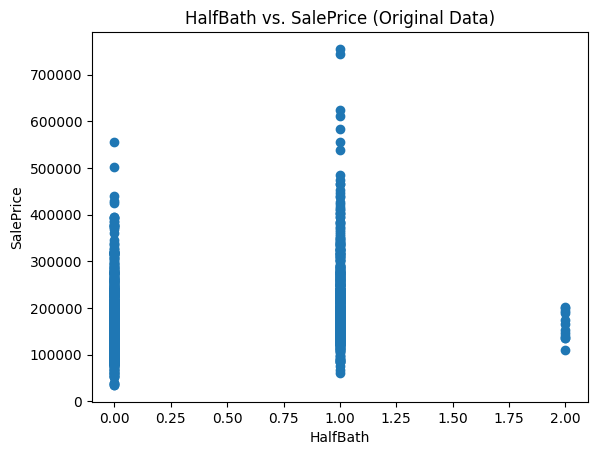

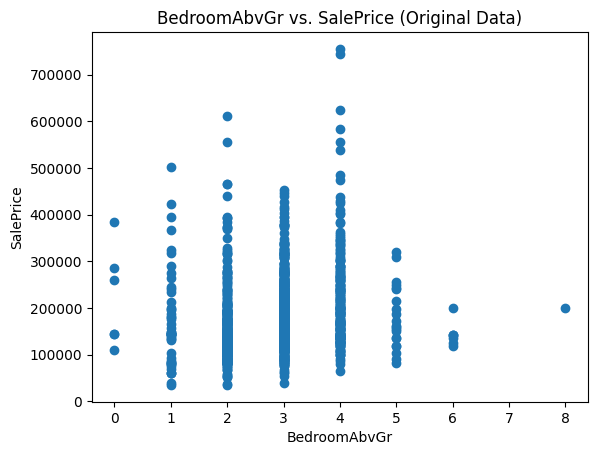

In [101]:
features=trdf[['1stFlrSF','2ndFlrSF','GrLivArea','TotalBsmtSF','LowQualFinSF','LotArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr']]
for feature in features:
    plt.scatter(trdf[feature], trdf['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(f'{feature} vs. SalePrice (Original Data)')
    plt.show()

In [102]:
from scipy.stats import zscore


z_scores = trdf[['1stFlrSF','2ndFlrSF','GrLivArea','TotalBsmtSF','LowQualFinSF','LotArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','SalePrice']].apply(zscore)


outliers = (z_scores.abs() > 3).any(axis=1)
df_outliers = trdf[outliers]
df_clean = trdf[~outliers]

print(f'Number of outliers: {df_outliers.shape[0]}')
print(f'Number of clean data points: {df_clean.shape[0]}')

trdf=df_clean

Number of outliers: 166
Number of clean data points: 1294


In [103]:
from sklearn.preprocessing import PolynomialFeatures
X=trdf[['1stFlrSF','2ndFlrSF','GrLivArea','TotalBsmtSF','LowQualFinSF','LotArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr']]
Y=trdf[['SalePrice']]

In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [105]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_poly_train, Y_train)

LinearRegression()

In [106]:
y_pred = model.predict(X_poly_test)

In [107]:
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 992718956.1173089
R-squared: 0.7757221258153593


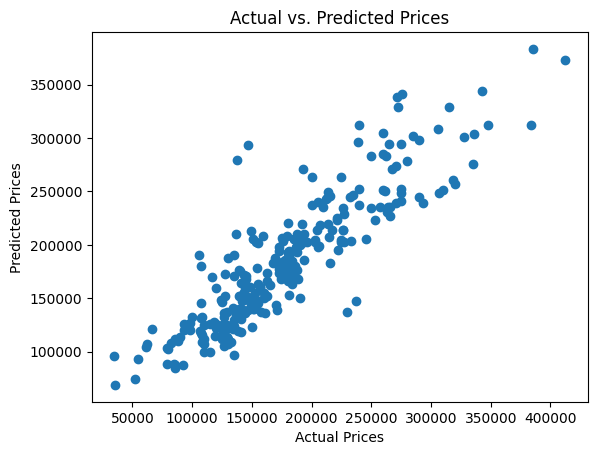

In [108]:
plt.scatter(Y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

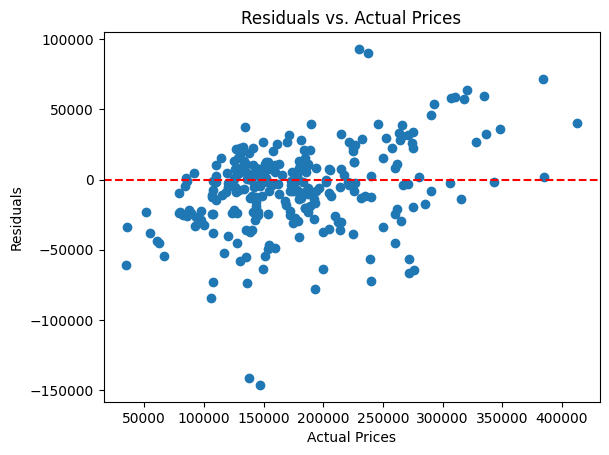

In [109]:

residuals = Y_test - y_pred
plt.scatter(Y_test, residuals)
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs. Actual Prices')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [110]:
# Predicting with new Values
testdf=pd.read_csv("test.csv")
testX=testdf.iloc[0:1]
testX=testX[['1stFlrSF','2ndFlrSF','GrLivArea','TotalBsmtSF','LowQualFinSF','LotArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr']]


In [113]:
new_data_poly = poly.transform(testX)


predicted_price = model.predict(new_data_poly)


print(f"Predicted sale price for the house: ${predicted_price}")



Predicted sale price for the house: $[[116112.16503934]]
